<div style="background-color: #ff87b2; padding: 20px; border-radius: 10px;">
<h3>Atividade 2:</h3>

Para o estudo de caso do Planejamento de Sucessão cujo objetivo é identificar funcionários com potencial para ocupar cargos de liderança no futuro e planejar a sucessão de cargos críticos. Atualize o código feito em sala:

<ul>
    <li> Execute a Pipeline sem usar os dados normalizados. Avalie o resultado de acurácia</li>
    <li> Usando os dados normalizados teste o desbalanceamento de dados usando Undersampling e Oversampling. Execute a Pipeline e avalie o resultado de acurácia</li>
        
</ul>

Poste no AVA o Jupyter Notebook ou o link para o repositório GitHub.
  
</div>

# 1. Execução da Pipeline sem usar os dados normalizados

In [1]:
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import joblib

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_processado = pd.read_csv("../data/interim/sucessao_processado.csv")
df_processado.head(5)

,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Lider,Coach,Empodera,...,Idade_18-29,Idade_30-39,Idade_40-49,Idade_50-59,Idade_60-69,Idade_70-79,Idade_80-89,Indice_lideranca,Indice_competencias,Engajamento_desenvolvimento
0,1,4.0,0.0,6.0,1,0.450857,4.0,0,0,1,...,0,0,0,1,0,0,0,0.483619,5.0,1.816952
1,4,4.0,0.0,8.0,0,0.096665,0.0,0,0,1,...,0,0,0,0,1,0,0,0.032222,6.0,1.365555
2,2,2.0,0.0,2.0,0,0.335153,4.0,0,0,1,...,0,0,1,0,0,0,0,0.111718,2.0,0.778384
3,4,5.0,0.0,2.0,1,0.506880,4.0,0,0,1,...,0,1,0,0,0,0,0,0.502293,3.5,2.168960
4,2,4.0,0.0,7.0,0,0.732740,0.0,0,0,1,...,0,0,0,1,0,0,0,0.244247,5.5,1.577580


## Divisão em treino e testes

In [4]:
X = df_processado.loc[:, df_processado.columns != 'Lider']
y = df_processado["Lider"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [5]:
X_train.to_csv('../data/train/X_train.csv', index=False)
X_test.to_csv('../data/train/X_test.csv', index=False)

y_train.to_csv('../data/train/y_train.csv', index=False)
y_test.to_csv('../data/train/y_test.csv', index=False)

# A função pipeline

In [6]:
pipeline_lr=Pipeline([('model_lr',LogisticRegression(random_state=42))])
pipeline_dt=Pipeline([('model_dt',DecisionTreeClassifier(random_state=42))])
pipeline_rf=Pipeline([('model_rf',RandomForestClassifier())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]
pipelines_dict = {0: 'LogisticRegression', 1: 'DecisionTree', 2: 'RandomForest'}

# Testando com os dados de treino

In [7]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
accuracy = []
for i, model in enumerate(pipelines):
    scores = cross_val_score(model, X_train,y_train, cv=10)
    accuracy.append(scores)
    print("%s: %f " % (pipelines_dict[i], scores.mean()))


LogisticRegression: 0.999696 
DecisionTree: 0.997570 
RandomForest: 0.999696 


# Testando com os dados de teste

In [8]:
for pipe in pipelines:
    pipe.fit(X_test, y_test)
    
accuracy = []
for i, model in enumerate(pipelines):
    scores = cross_val_score(model, X_test,y_test, cv=10)
    accuracy.append(scores)
    print("%s: %f " % (pipelines_dict[i], scores.mean()))


LogisticRegression: 0.999291 
DecisionTree: 0.993627 
RandomForest: 0.998582 


<div style="background-color: #ffffff; padding: 20px; border-radius: 10px; color: #000000;">
<h2> <b>Comparação da execução da pipeline usando dados normalizados x dados não normalizados:</b></h2>

<h3>Resultados com dados normalizados (usando dados de treino)</h3>
<ul>
    <li> LogisticRegression: 0.999088 </li>
    <li> DecisionTree: 0.996962 </li>
    <li> RandomForest: 0.999088</li>
        
</ul>

<h3>Resultados com dados normalizados (usando dados de teste)</h3>
<ul>
    <li> LogisticRegression: 0.998587  </li>
    <li> DecisionTree: 0.995045 </li>
    <li> RandomForest: 0.999296 </li>
        
</ul>


<h3>Resultados com dados não normalizados (usando dados de treino)</h3>
<ul>
    <li> LogisticRegression: 0.999696   </li>
    <li> DecisionTree: 0.997570  </li>
    <li> RandomForest: 1.000000 </li>
        
</ul>


<h3>Resultados com dados não normalizados (usando dados de teste)</h3>
<ul>
    <li>LogisticRegression: 0.999291</li>
    <li> DecisionTree: 0.993627</li>
    <li> RandomForest: 0.996454</li>
        
</ul>
  
</div>

<div style="background-color: #ffffff; padding: 20px; border-radius: 10px; color: #000000;">
<h2><b>Análise:</b></h2>

Pode-se perceber que os resultados de acurácia dos modelos não têm grande variação, o que pode indicar algumas possibilidades:

<ul>
    <li><b>Overfitting:</b> provavelmente o modelo memorizou os dados de treinamento, nesse caso o ideal seria checar outras métricas como precisão, recall e F1-score.</li>
    <li> <b>Modelo não sensível à escala:</b> os algoritmos utilizados (Logistic Regression, Decision Tree e Random Forest) podem não ser sensíveis à escala porque não dependem da "distância" entre os diversos tipos de dados</li>
    <li> <b>A influência dos outliers é limitada:</b> o conjunto de dados pode não ter outliers extremos ou esses outliers não tem influÊncia significativa no modelo.</li>
        
</ul> 
</div>

# 2. Usando os dados normalizados para testar o desbalanceamento de dados usando Undersampling e Oversampling

In [9]:
df_normalizado = pd.read_csv("../data/processed/sucessao_normalizado.csv")
df_normalizado.head(5)

,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Coach,Empodera,Sucesso_membros,...,Idade_30-39,Idade_40-49,Idade_50-59,Idade_60-69,Idade_70-79,Idade_80-89,Indice_lideranca,Indice_competencias,Engajamento_desenvolvimento,Lider
0,0.25,0.8,0.0,0.6,1.0,0.450811,0.8,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.483786,0.666667,0.778992,0
1,1.00,0.8,0.0,0.8,0.0,0.096393,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.031912,0.800000,0.585293,0
2,0.50,0.4,0.0,0.2,0.0,0.335034,0.8,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.111492,0.266667,0.333332,0
3,1.00,1.0,0.0,0.2,1.0,0.506871,0.8,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.502480,0.466667,0.930042,0
4,0.50,0.8,0.0,0.7,0.0,0.732875,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.244161,0.733333,0.676275,0


# Divisão em treino e testes

In [10]:
X = df_normalizado.loc[:, df_normalizado.columns != 'Lider']
y = df_normalizado["Lider"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [11]:
X_train.to_csv('../data/train/X_train.csv', index=False)
X_test.to_csv('../data/train/X_test.csv', index=False)

y_train.to_csv('../data/train/y_train.csv', index=False)
y_test.to_csv('../data/train/y_test.csv', index=False)

# Fazendo o balanceamento dos dados

# Balanceamento com Undersampling:

<div style="padding: 20px; border-radius: 10px;">
<b>Undersampling</b> envolve <b>reduzir a quantidade de dados da classe majoritária</b> para igualar a classe minoritária, equilibrando as observações.
</div>

## Utilizando dados de treino: 

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 'majority')
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)

In [13]:
count1 = X_resampled_under["Experiencia_cargos_lideranca"].value_counts().reset_index()
count1.columns = ['Experiencia_cargos_lideranca', 'Contagem']

count2 = y_resampled_under.value_counts().reset_index()
count2.columns = ['Lider', 'Contagem']

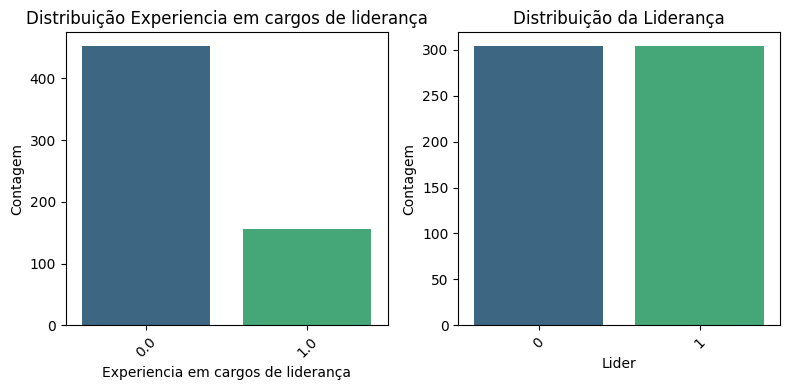

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(data=count1, x='Experiencia_cargos_lideranca', y='Contagem', palette='viridis', ax=axes[0])
axes[0].set_title('Distribuição Experiencia em cargos de liderança')
axes[0].set_xlabel('Experiencia em cargos de liderança')
axes[0].set_ylabel('Contagem')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=count2, x='Lider', y='Contagem', palette='viridis', ax=axes[1])
axes[1].set_title('Distribuição da Liderança')
axes[1].set_xlabel('Lider')
axes[1].set_ylabel('Contagem')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [15]:
for pipe in pipelines:
    pipe.fit(X_test, y_test)
    
accuracy = []
for i, model in enumerate(pipelines):
    scores = cross_val_score(model, X_resampled_under,y_resampled_under, cv=10)
    accuracy.append(scores)
    print("%s: %f " % (pipelines_dict[i], scores.mean()))

LogisticRegression: 0.998361 
DecisionTree: 0.995055 
RandomForest: 1.000000 


## Utilizando dados de teste:

In [16]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 'majority')
X_resampled_under, y_resampled_under = rus.fit_resample(X_test, y_test)

In [17]:
count1 = X_resampled_under["Experiencia_cargos_lideranca"].value_counts().reset_index()
count1.columns = ['Experiencia_cargos_lideranca', 'Contagem']

count2 = y_resampled_under.value_counts().reset_index()
count2.columns = ['Lider', 'Contagem']

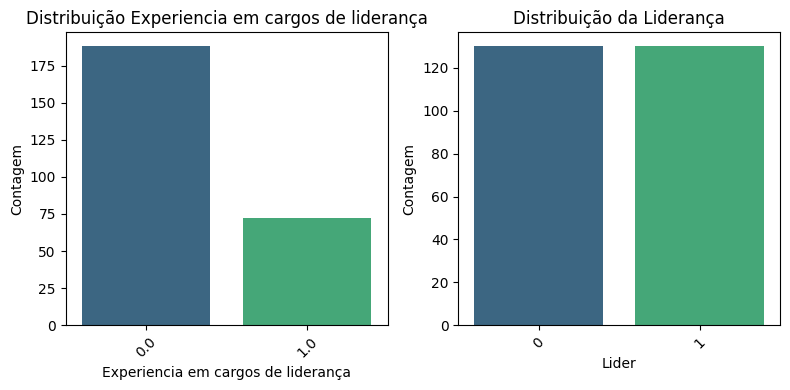

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(data=count1, x='Experiencia_cargos_lideranca', y='Contagem', palette='viridis', ax=axes[0])
axes[0].set_title('Distribuição Experiencia em cargos de liderança')
axes[0].set_xlabel('Experiencia em cargos de liderança')
axes[0].set_ylabel('Contagem')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=count2, x='Lider', y='Contagem', palette='viridis', ax=axes[1])
axes[1].set_title('Distribuição da Liderança')
axes[1].set_xlabel('Lider')
axes[1].set_ylabel('Contagem')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [19]:
for pipe in pipelines:
    pipe.fit(X_test, y_test)
    
accuracy = []
for i, model in enumerate(pipelines):
    scores = cross_val_score(model, X_resampled_under,y_resampled_under, cv=10)
    accuracy.append(scores)
    print("%s: %f " % (pipelines_dict[i], scores.mean()))

LogisticRegression: 0.996154 
DecisionTree: 0.984615 
RandomForest: 0.996154 


# Balanceamento com Oversampling:

<div style="padding: 20px; border-radius: 10px;">
<b>Oversampling</b> <b>aumenta a quantidade de registros da classe minoritária</b>, podendo duplicar registros aleatoriamente, embora isso possa gerar muitas informações idênticas. Para evitar duplicações, pode-se usar a técnica SMOTE, que cria novos dados sintéticos semelhantes aos dados reais, mas não idênticos. O SMOTE é projetado para gerar novos exemplos sintéticos interpolando entre os existentes, o que pode resultar em valores contínuos. </div>

## Utilizando dados de treino:

In [20]:
# importar as bibliotecas necessárias
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled_Over, y_resampled_Over = smote.fit_resample(X_train, y_train)

In [21]:
count1 = X_resampled_Over["Experiencia_cargos_lideranca"].value_counts().reset_index()
count1.columns = ['Experiencia_cargos_lideranca', 'Contagem']

count2 = y_resampled_Over.value_counts().reset_index()
count2.columns = ['Lider', 'Contagem']

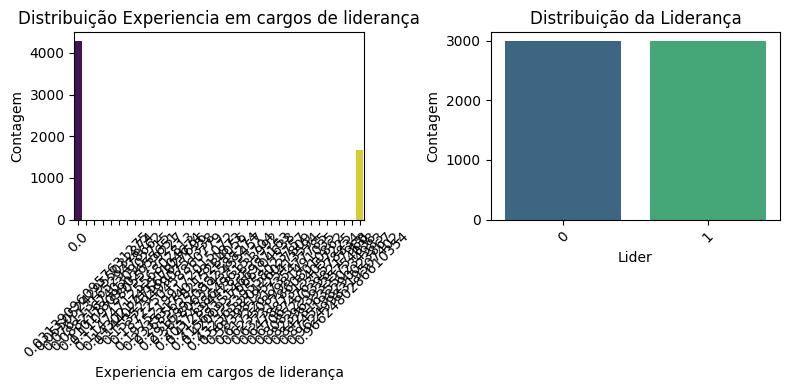

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(data=count1, x='Experiencia_cargos_lideranca', y='Contagem', palette='viridis', ax=axes[0])
axes[0].set_title('Distribuição Experiencia em cargos de liderança')
axes[0].set_xlabel('Experiencia em cargos de liderança')
axes[0].set_ylabel('Contagem')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=count2, x='Lider', y='Contagem', palette='viridis', ax=axes[1])
axes[1].set_title('Distribuição da Liderança')
axes[1].set_xlabel('Lider')
axes[1].set_ylabel('Contagem')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [23]:
for pipe in pipelines:
    pipe.fit(X_test, y_test)
    
accuracy = []
for i, model in enumerate(pipelines):
    scores = cross_val_score(model, X_resampled_Over,y_resampled_Over, cv=10)
    accuracy.append(scores)
    print("%s: %f " % (pipelines_dict[i], scores.mean()))

LogisticRegression: 0.999163 
DecisionTree: 0.998328 
RandomForest: 0.999498 


# Utilizando dados de teste:

In [24]:
# importar as bibliotecas necessárias
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled_Over, y_resampled_Over = smote.fit_resample(X_test, y_test)

In [25]:
count1 = X_resampled_Over["Experiencia_cargos_lideranca"].value_counts().reset_index()
count1.columns = ['Experiencia_cargos_lideranca', 'Contagem']

count2 = y_resampled_Over.value_counts().reset_index()
count2.columns = ['Lider', 'Contagem']

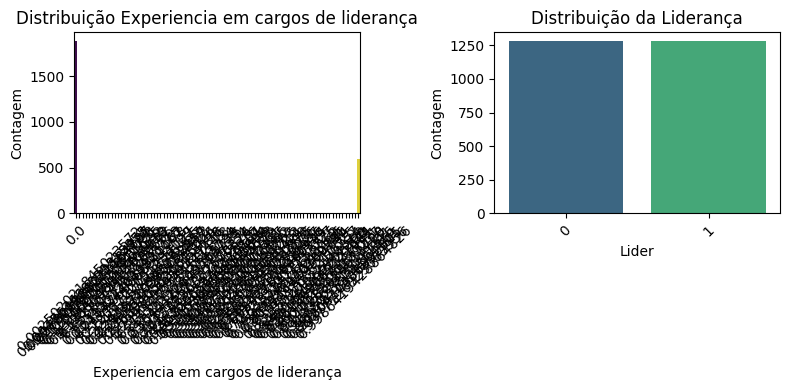

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(data=count1, x='Experiencia_cargos_lideranca', y='Contagem', palette='viridis', ax=axes[0])
axes[0].set_title('Distribuição Experiencia em cargos de liderança')
axes[0].set_xlabel('Experiencia em cargos de liderança')
axes[0].set_ylabel('Contagem')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=count2, x='Lider', y='Contagem', palette='viridis', ax=axes[1])
axes[1].set_title('Distribuição da Liderança')
axes[1].set_xlabel('Lider')
axes[1].set_ylabel('Contagem')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [27]:
for pipe in pipelines:
    pipe.fit(X_test, y_test)
    
accuracy = []
for i, model in enumerate(pipelines):
    scores = cross_val_score(model, X_resampled_Over,y_resampled_Over, cv=10)
    accuracy.append(scores)
    print("%s: %f " % (pipelines_dict[i], scores.mean()))

LogisticRegression: 0.999609 
DecisionTree: 0.996883 
RandomForest: 0.998053 


<div style="background-color: #ffffff; padding: 20px; border-radius: 10px; color: #000000;">
<h2> <b>Comparação da execução da pipeline usando Oversampling x Undersampling:</b></h2>

<h3>Resultados de undersampling (usando dados de treino)</h3>
<ul>
    <li> LogisticRegression: 0.998361  </li>
    <li> DecisionTree: 0.995055 </li>
    <li> RandomForest: 1.000000</li>        
</ul>

<h3>Resultados de undersampling (usando dados de teste)</h3>
<ul>
    <li> LogisticRegression: 0.996154  </li>
    <li> DecisionTree: 0.984615 </li>
    <li> RandomForest: 0.996154 </li>
</ul>


<h3>Resultados de oversampling (usando dados de treino)</h3>
<ul>
    <li> LogisticRegression: 0.999163   </li>
    <li> DecisionTree: 0.998328  </li>
    <li> RandomForest: 0.999498 </li>
</ul>


<h3>Resultados de oversampling (usando dados de teste)</h3>
<ul>
    <li>LogisticRegression: 0.999609</li>
    <li> DecisionTree: 0.996883</li>
    <li> RandomForest: 0.998053</li>   
</ul>
  
</div>

<div style="background-color: #ffffff; padding: 20px; border-radius: 10px; color: #000000;">
<h2><b>Análise:</b></h2>

Pode-se perceber que os resultados de acurácia dos modelos não têm grande variação, exceto pela acurácia do modelo Decision Tree utilizando <b>undersampling</b>. Isso pode ser explicado pela redução dos dados da classe majoritária, o que nesse caso levou a uma diminuição drástica da quantidade de dados utilizados no modelo.

Pode-se perceber também que os resultados de acurária dos modelos que utilizaram dados balanceados com <b>oversampling</b> utilizando a técnica SMOTE são muito semelhantes. Isso pode ser explicado pelo fato de a técnica SMOTE gerar em valores contínuos ao criar dados sintéticos.
</div>